# Coursework 1 Group (text)

Complete the following information

Group number: ...

Student names and k-numbers:
1. ...
2. ...
3. ...
4. ...






# Load modules (code)

In [64]:
# Load modules

# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from itertools import cycle

import matplotlib.pyplot as plt
import seaborn as sns

# Load data (code)

In [65]:
# add code for loading data

digits = load_digits()
x, y = digits.data, digits.target

# Binarize the labels for multi-class ROC
yBin = label_binarize(y, classes = range(10))  # 10 classes for digits 0-9
nClasses = yBin.shape[1]

# Split the data into training (80%) and testing (20%)
xTrain, xTest, yTrain, yTest = train_test_split(x, yBin, test_size = 0.2, random_state = 7) # random_state = 7 because SUIIII!!!!

# Standardize the features (important for KNN)
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# Classification

## Classification methods used (text)

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1.   K-Nearest Neighbors (Tanishq Tak)
2.   Naive Bayes (Tanishq Tak)

## Training (code)

In [67]:
# Add code for training

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain.argmax(axis=1))  # Use original labels for training

# Naive Bayes
nb = GaussianNB()
nb.fit(xTrain, yTrain.argmax(axis=1))  # Use original labels for training

GaussianNB()

## Evaluation (code)

Evaluation for KNN:
Balanced Accuracy: 0.9699
ROC AUC (Macro): 0.9955


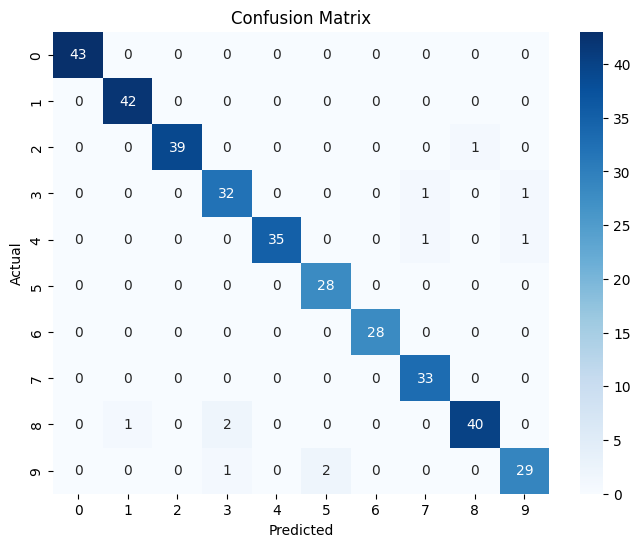

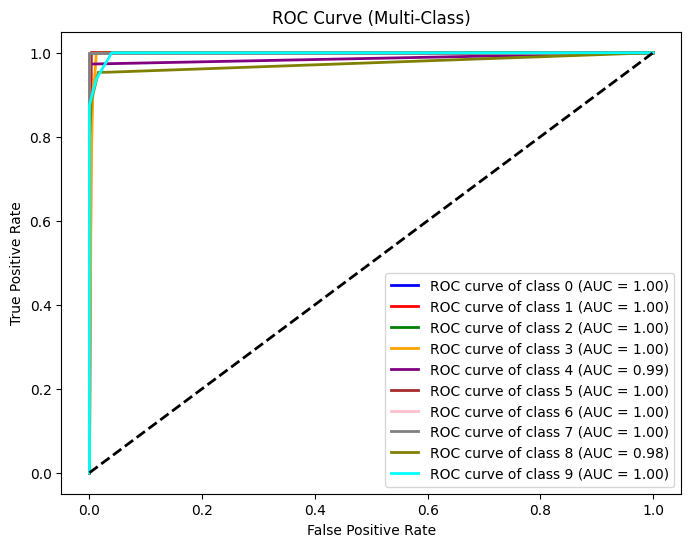

Evaluation for Naive Bayes:
Balanced Accuracy: 0.7770
ROC AUC (Macro): 0.9733


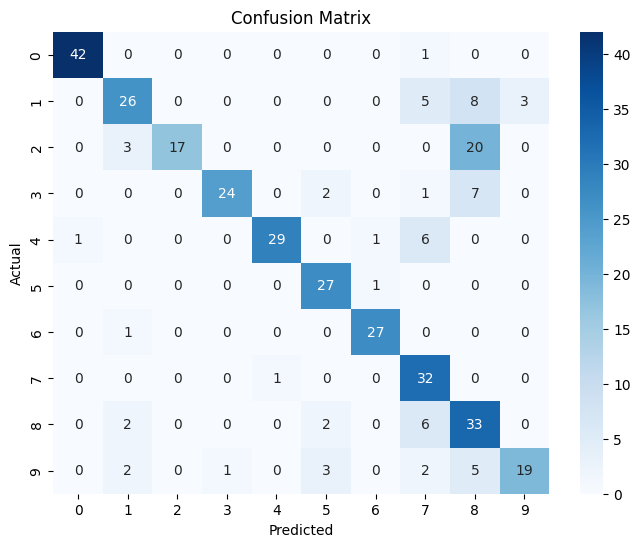

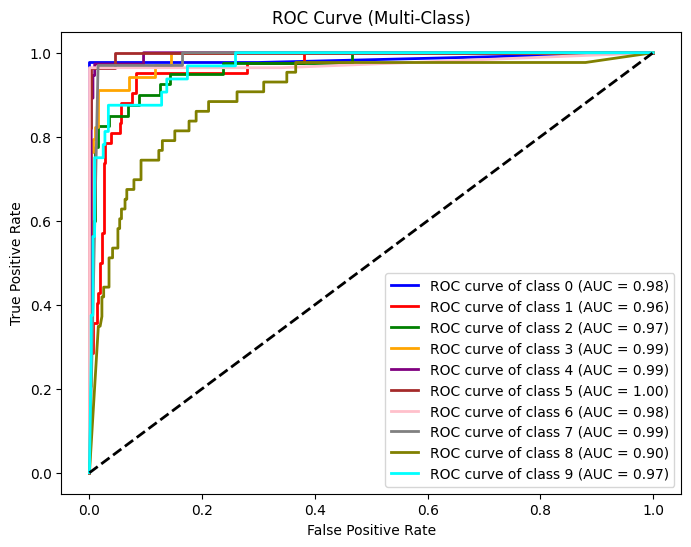

In [71]:
# Add code for evaluation

def Evaluate(model, xTest, yTest, methodName):
    yPredict = model.predict(xTest)
    yProba = model.predict_proba(xTest)

    print(f"Evaluation for {methodName}:")

    # Balanced Accuracy
    balanceAccuracy = balanced_accuracy_score(yTest.argmax(axis=1), yPredict)
    print(f"Balanced Accuracy: {balanceAccuracy:.4f}")

    # ROC AUC (macro-averaged)
    rocAuc = roc_auc_score(yTest, yProba, multi_class = 'ovr', average = 'macro')
    print(f"ROC AUC (Macro): {rocAuc:.4f}")

    # Confusion Matrix
    confusionMatrix = confusion_matrix(yTest.argmax(axis=1), yPredict)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusionMatrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = range(10), yticklabels = range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (macro-averaged)
    falsePositiveRate = dict()
    truePositiveRate = dict()
    rocAuc = dict()
    for i in range(nClasses):
        falsePositiveRate[i], truePositiveRate[i], _ = roc_curve(yTest[:, i], yProba[:, i])
        rocAuc[i] = roc_auc_score(yTest[:, i], yProba[:, i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
    for i, color in zip(range(nClasses), colors):
        plt.plot(falsePositiveRate[i], truePositiveRate[i], color = color, lw = 2, label = f'ROC curve of class {i} (AUC = {rocAuc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Multi-Class)')
    plt.legend(loc = "lower right")
    plt.show()

Evaluate(knn, xTest, yTest, "KNN")
Evaluate(nb, xTest, yTest, "Naive Bayes")

# References (text)

List any references you may have used in your document before, using one of the established referencing system (e.g. IEEE, Harvard, etc).